In [1]:
import lime

import numpy as np
import pandas as pd
import sklearn
import sklearn.ensemble
import sklearn.metrics
#from __future__ import print_function

import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_20newsgroups

# Word2Vec
from gensim.models import KeyedVectors

# For X-Why Plotting
import plotly.express as px

#NLP
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


#NLP_2
import string
import re
import nltk
from nltk.tokenize import TweetTokenizer

In [2]:
#!pip install textdistance

# import textdistance
# perturbed_text = perturb_text(text_list, perturbations[2])
# print(textdistance.hamming.distance(a, str(perturbed_text)))

# print(textdistance.smith_waterman.similarity(a, str(perturbed_text)))

In [3]:
EMPEDDING_PATH = "../input/gensim-embeddings-dataset/"

# Load embedding
# embedding_glove = KeyedVectors.load(f"{EMPEDDING_PATH}glove.840B.300d.gensim")
embedding_google = KeyedVectors.load(f"{EMPEDDING_PATH}GoogleNews-vectors-negative300.gensim")
# embedding_paragram = KeyedVectors.load(f"{EMPEDDING_PATH}paragram_300_sl999.gensim")

In [4]:
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(n_estimators=500)

In [5]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.9220023282887078

In [6]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)
print(c.predict_proba([newsgroups_test.data[0]]))

[[0.292 0.708]]


In [7]:
%%time
idx = 50

from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

Document id: 50
Probability(christian) = 0.68
True class: christian
CPU times: user 9.24 s, sys: 6.26 s, total: 15.5 s
Wall time: 6.16 s


In [8]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Posting']] = 0
tmp[0,vectorizer.vocabulary_['Host']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

Original prediction: 0.68
Prediction removing some features: 0.68
Difference: 0.0


/opt/conda/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


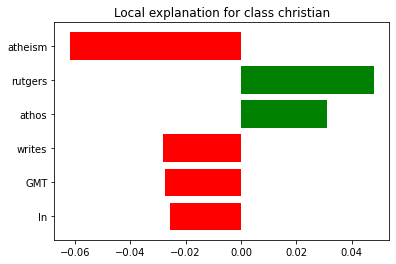

In [9]:
 %matplotlib inline
fig = exp.as_pyplot_figure()

In [10]:
exp.show_in_notebook(text=True)

In [11]:
exp.as_list()
exp2 = exp.local_exp#.items()

exp3 = []
for ii, jj in exp2[1]:
    exp3.append(jj)
    
print(np.array(exp3))

feats = []
for ii in range(6):
    feats.append(exp.as_list()[ii][0])
    
print(feats)

[-0.06187558  0.04810953  0.03094294 -0.02825227 -0.02741381 -0.02561987]
['atheism', 'rutgers', 'athos', 'writes', 'GMT', 'In']


In [12]:
a = newsgroups_test.data[idx]
print(a)
words = a.split()
words = [word.strip('-.,!;()[]:@') for word in words]
words = [word.replace("'s", '') for word in words]
words = [word.replace(".", '') for word in words]

#finding unique
unique = []
for word in words:
    if word not in unique:
        unique.append(word)

#sort
unique.sort()

#print
print(unique)
print(len(unique))

From: bruce@liv.ac.uk (Bruce Stephens)
Subject: Re: Why do people become atheists?
Organization: Centre for Mathematical Software Research, Univ. Liverpool
Lines: 31

>>>>> On 11 May 93 06:38:48 GMT, Fil.Sapienza@med.umich.edu (Fil Sapienza) said:

> In article <May.7.01.09.44.1993.14556@athos.rutgers.edu> maxwell c muir,
> muirm@argon.gas.organpipe.uug.arizona.edu writes:

>>The ambiguity of religious beliefs, an unwillingness to take
>>Pascal's Wager, 

> I've heard this frequently - what exactly is Pascal's wager?

Either A: God exists, or B: He doesn't.  We have two choices, either
1: Believe in God, or 2: Don't believe in God.  If A is true, then 2
brings eternal damnation, whereas 1 brings eternal life.  If B is
true, then 1 has minor inconvenience compared with 2.  Thus, it is
rational to believe in God.

This has numerous flaws, covered in the FAQ for alt.atheism, amongst
other places.

>>	Do I sound "broken" to you?

> I don't know.  You point out that your mother's treatment 

In [13]:
import string
import re
import nltk
from nltk.tokenize import TweetTokenizer

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

cleaned_words = clean_text(a)
print(cleaned_words)

from brucelivacuk bruce stephens subject re why do people become atheists organization centre for mathematical software research univ liverpool lines on may gmt filsapienzamedumichedu fil sapienza said in article mayathosrutgersedu maxwell c muir muirmargongasorganpipeuugarizonaedu writes the ambiguity of religious beliefs an unwillingness to take pascals wager ive heard this frequently what exactly is pascals wager either a god exists or b he doesnt we have two choices either believe in god or dont believe in god if a is true then brings eternal damnation whereas brings eternal life if b is true then has minor inconvenience compared with thus it is rational to believe in god this has numerous flaws covered in the faq for altatheism amongst other places do i sound broken to you i dont know you point out that your mothers treatment upset you and see inconsistencies in various religions im not sure if that constitutes brokenness or not it certainly consititutes disillusionment disillusio

In [14]:
num_perturb = 150
num_uniqe_words = len(unique)
perturbations = np.random.binomial(1, 0.2, size=(num_perturb, num_uniqe_words))
print(perturbations[0]) #Show example of perturbation

def perturb_text(text_list, perturbation):
    text_list = unique.copy()
    for x, y in enumerate(text_list):
        if perturbation[x] == 0:
            text_list.remove(y)
            
words = a.split()
text_list = words.copy()
num_perturb = 150
num_words = len(words)
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_words))
perturbed_text = perturb_text(text_list, perturbations[0])
print(c.predict_proba([str(perturbed_text)]))

predictions = []
for pert in perturbations:
    perturbed_text = perturb_text(text_list, pert)
    pred = c.predict_proba([str(perturbed_text)])
    predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

original_text = np.ones(num_words)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_text, metric='cosine').ravel()
print(distances.shape)

kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

class_to_explain = 0
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
#print(coeff)

num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
print(top_features)

new_text = []
for idx2 in top_features:
    new_text.append(words[idx2])
    
print(new_text)

[1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0]
[[0.072 0.928]]
(150, 1, 2)
(150,)
(150,)
[ 69  70  72 196]
['B:', 'He', 'We', 'myth-information']


In [ ]:
def xwhy_text(X_input_text, model, perturbations=perturbations, embd= embedding_google, num_perturb = 50, kernel_width = 0.25, num_top_features = 10, eps=0.5):
    
    wod = X_input_text.split()
# #     words = pp_text
    wod = [word.strip('-.,!;()[]@><:') for word in wod]
#     wod = [word.replace("'s", '') for word in wod]
    wod = [word.replace(".", '') for word in wod]
    wod = [word.replace("-", '') for word in wod]
#     words = [word.replace(":", '') for word in words]
#     words = [word.replace(">", '') for word in words]
    

    #finding unique
    unique = []
    for word in wod:
        if word not in unique:
            unique.append(word)

    #sort
    unique.sort()
    
    #num_perturb = 150
    num_uniqe_words = len(wod)
    perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_uniqe_words))
    text_list = wod.copy()
    
    def perturb_text(text_list, perturbation):
        for x, y in enumerate(text_list):
            if perturbation[x] == 0:
                text_list.remove(y)
                
    predictions = []
    WD_dist = []
    for pert in perturbations:
        perturbed_text = perturb_text(text_list, pert)
        pred = model.predict_proba([str(perturbed_text)])
        predictions.append(pred)
        WD_score = embd.wmdistance(str(wod), str(perturbed_text))
        WD_dist.append(WD_score)

    predictions = np.array(predictions)   
    WD_dist = np.array(WD_dist) 
    
    weights = np.sqrt(np.exp(-((eps*WD_dist)**2)/kernel_width**2)) #Kernel function
    
    print(perturbations.shape)
    
#     print(predictions.shape)
    
    print(weights.shape)
    
    print(predictions[:,:,0].shape)
                
    class_to_explain = 0
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:,:, class_to_explain], sample_weight=weights)
    coeff = simpler_model.coef_[0]
    
    print(coeff.shape)

    coeff3 = coeff[0:50]
    
    num_top_features = 50
    top_features = np.argsort(abs(coeff))[-num_top_features:] 
    
    coeff2 = simpler_model.coef_
    
    print(coeff3.shape)
    # https://stackoverflow.com/questions/39626401/how-to-get-odds-ratios-and-other-related-features-with-scikit-learn
    odds = np.exp(coeff2)
    
    
    return coeff3, coeff, odds, top_features, wod 

In [16]:
%%time
idx = 88
coeff3, coeff, odds, top_features, wod  = xwhy_text(newsgroups_test.data[idx], model=c, perturbations=perturbations, embd= embedding_google, 
                                      num_perturb = 1000, kernel_width = 0.25, num_top_features = 10, eps=0.01)

(1000, 160)
(1000,)
(1000, 1)
(160,)
(50,)
CPU times: user 1min 1s, sys: 1.42 s, total: 1min 3s
Wall time: 1min 3s


In [17]:
coeff

array([-2.24629600e-30, -7.19426930e-31, -1.54764305e-30, -1.60297199e-30,
       -1.88607013e-30, -1.04218495e-30, -2.18049619e-30, -1.99149301e-30,
       -3.03547746e-31, -1.68039007e-30, -1.29085313e-30, -9.47837539e-31,
        1.87004234e-31,  4.94288721e-32, -1.12545451e-30, -1.34982796e-30,
       -9.79757838e-31, -7.41691374e-31, -5.39927496e-31, -1.29072267e-30,
       -1.37523076e-30, -4.55962323e-31, -1.24640866e-30, -1.58724198e-30,
       -9.52724740e-31, -9.51407836e-31, -1.15734693e-30, -2.24339945e-30,
       -1.22488048e-30, -1.59366115e-30, -2.37752810e-30, -6.18497904e-31,
       -1.28661159e-30, -1.58504166e-30, -1.70461208e-30, -2.21910743e-30,
       -8.67971352e-31, -1.96956664e-30, -2.10169985e-30, -1.90687503e-30,
       -1.29814877e-30, -1.55615583e-30, -1.02063991e-30, -1.13060987e-30,
       -1.94355803e-30, -1.19924802e-30, -1.86673683e-30, -7.11037099e-31,
       -1.36896482e-30, -1.30794376e-30, -1.10530992e-30, -1.41414416e-30,
       -1.98247959e-30, -

In [18]:
df3 = pd.DataFrame()

top_feat = 6

print(top_features[-top_feat:])

new_text = []
for idx3 in top_features[-top_feat:]:
    new_text.append(wod[idx3])

df3['XWHY'] = coeff[-top_feat:] 
df3['feature_names'] = new_text #top_features[-top_feat:]#

# top_features = np.argsort(coeff)[-num_top_features:] 

fig = px.bar(df3, x=df3['XWHY'], y=df3['feature_names'], orientation='h', color='feature_names')
fig.show()

[ 35  27   0  65 159  30]


In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("SMILE","LIME",))

fig.add_trace(
    go.Bar(x=df3['XWHY'], y=df3['feature_names'], orientation='h', 
           marker=dict(color=np.argsort(df3['XWHY']).values, coloraxis="coloraxis")),#, color=df3['feature_names']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=exp3, y=feats, orientation='h', marker=dict(color=np.argsort(exp3), coloraxis="coloraxis")),
    row=1, col=2
)

fig.update_layout(height=600, width=1200, title_text="Comparing SMILE and LIME (Negative: Atheism, Positive: Christian)",
                  coloraxis=dict(colorscale='Bluered_r'), showlegend=False) # px.colors.sequential.Viridis
fig.show()

# Manipulating LIME Original Functions to make it SMILE

In [20]:
from functools import partial
import itertools
import json
import re

import numpy as np
import scipy as sp
import sklearn
from sklearn.utils import check_random_state
from sklearn.linear_model import Ridge, lars_path

# from lime import explanation


# from lime import lime_base

from io import open
import os
import os.path
import json
import string
import numpy as np

class LimeError(Exception):
    """Raise for errors"""

from sklearn.utils import check_random_state

import sys

sys.path.insert(1, "../input/lime2test2")

import explanation
import lime_base

from lime_base import LimeBase


class TextDomainMapper(explanation.DomainMapper):
    """Maps feature ids to words or word-positions"""

    def __init__(self, indexed_string):
        """Initializer.
        Args:
            indexed_string: lime_text.IndexedString, original string
        """
        self.indexed_string = indexed_string

    def map_exp_ids(self, exp, positions=False):
        """Maps ids to words or word-position strings.
        Args:
            exp: list of tuples [(id, weight), (id,weight)]
            positions: if True, also return word positions
        Returns:
            list of tuples (word, weight), or (word_positions, weight) if
            examples: ('bad', 1) or ('bad_3-6-12', 1)
        """
        if positions:
            exp = [('%s_%s' % (
                self.indexed_string.word(x[0]),
                '-'.join(
                    map(str,
                        self.indexed_string.string_position(x[0])))), x[1])
                   for x in exp]
        else:
            exp = [(self.indexed_string.word(x[0]), x[1]) for x in exp]
        return exp

    def visualize_instance_html(self, exp, label, div_name, exp_object_name,
                                text=True, opacity=True):
        """Adds text with highlighted words to visualization.
        Args:
             exp: list of tuples [(id, weight), (id,weight)]
             label: label id (integer)
             div_name: name of div object to be used for rendering(in js)
             exp_object_name: name of js explanation object
             text: if False, return empty
             opacity: if True, fade colors according to weight
        """
        if not text:
            return u''
        text = (self.indexed_string.raw_string()
                .encode('utf-8', 'xmlcharrefreplace').decode('utf-8'))
        text = re.sub(r'[<>&]', '|', text)
        exp = [(self.indexed_string.word(x[0]),
                self.indexed_string.string_position(x[0]),
                x[1]) for x in exp]
        all_occurrences = list(itertools.chain.from_iterable(
            [itertools.product([x[0]], x[1], [x[2]]) for x in exp]))
        all_occurrences = [(x[0], int(x[1]), x[2]) for x in all_occurrences]
        ret = '''
            %s.show_raw_text(%s, %d, %s, %s, %s);
            ''' % (exp_object_name, json.dumps(all_occurrences), label,
                   json.dumps(text), div_name, json.dumps(opacity))
        return ret


class IndexedString(object):
    """String with various indexes."""

    def __init__(self, raw_string, split_expression=r'\W+', bow=True,
                 mask_string=None):
        """Initializer.
        Args:
            raw_string: string with raw text in it
            split_expression: Regex string or callable. If regex string, will be used with re.split.
                If callable, the function should return a list of tokens.
            bow: if True, a word is the same everywhere in the text - i.e. we
                 will index multiple occurrences of the same word. If False,
                 order matters, so that the same word will have different ids
                 according to position.
            mask_string: If not None, replace words with this if bow=False
                if None, default value is UNKWORDZ
        """
        self.raw = raw_string
        self.mask_string = 'UNKWORDZ' if mask_string is None else mask_string

        if callable(split_expression):
            tokens = split_expression(self.raw)
            self.as_list = self._segment_with_tokens(self.raw, tokens)
            tokens = set(tokens)

            def non_word(string):
                return string not in tokens

        else:
            # with the split_expression as a non-capturing group (?:), we don't need to filter out
            # the separator character from the split results.
            splitter = re.compile(r'(%s)|$' % split_expression)
            self.as_list = [s for s in splitter.split(self.raw) if s]
            non_word = splitter.match

        self.as_np = np.array(self.as_list)
        self.string_start = np.hstack(
            ([0], np.cumsum([len(x) for x in self.as_np[:-1]])))
        vocab = {}
        self.inverse_vocab = []
        self.positions = []
        self.bow = bow
        non_vocab = set()
        for i, word in enumerate(self.as_np):
            if word in non_vocab:
                continue
            if non_word(word):
                non_vocab.add(word)
                continue
            if bow:
                if word not in vocab:
                    vocab[word] = len(vocab)
                    self.inverse_vocab.append(word)
                    self.positions.append([])
                idx_word = vocab[word]
                self.positions[idx_word].append(i)
            else:
                self.inverse_vocab.append(word)
                self.positions.append(i)
        if not bow:
            self.positions = np.array(self.positions)

    def raw_string(self):
        """Returns the original raw string"""
        return self.raw

    def num_words(self):
        """Returns the number of tokens in the vocabulary for this document."""
        return len(self.inverse_vocab)

    def word(self, id_):
        """Returns the word that corresponds to id_ (int)"""
        return self.inverse_vocab[id_]

    def string_position(self, id_):
        """Returns a np array with indices to id_ (int) occurrences"""
        if self.bow:
            return self.string_start[self.positions[id_]]
        else:
            return self.string_start[[self.positions[id_]]]

    def inverse_removing(self, words_to_remove):
        """Returns a string after removing the appropriate words.
        If self.bow is false, replaces word with UNKWORDZ instead of removing
        it.
        Args:
            words_to_remove: list of ids (ints) to remove
        Returns:
            original raw string with appropriate words removed.
        """
        mask = np.ones(self.as_np.shape[0], dtype='bool')
        mask[self.__get_idxs(words_to_remove)] = False
        if not self.bow:
            return ''.join(
                [self.as_list[i] if mask[i] else self.mask_string
                 for i in range(mask.shape[0])])
        return ''.join([self.as_list[v] for v in mask.nonzero()[0]])

    @staticmethod
    def _segment_with_tokens(text, tokens):
        """Segment a string around the tokens created by a passed-in tokenizer"""
        list_form = []
        text_ptr = 0
        for token in tokens:
            inter_token_string = []
            while not text[text_ptr:].startswith(token):
                inter_token_string.append(text[text_ptr])
                text_ptr += 1
                if text_ptr >= len(text):
                    raise ValueError("Tokenization produced tokens that do not belong in string!")
            text_ptr += len(token)
            if inter_token_string:
                list_form.append(''.join(inter_token_string))
            list_form.append(token)
        if text_ptr < len(text):
            list_form.append(text[text_ptr:])
        return list_form

    def __get_idxs(self, words):
        """Returns indexes to appropriate words."""
        if self.bow:
            return list(itertools.chain.from_iterable(
                [self.positions[z] for z in words]))
        else:
            return self.positions[words]


class IndexedCharacters(object):
    """String with various indexes."""

    def __init__(self, raw_string, bow=True, mask_string=None):
        """Initializer.
        Args:
            raw_string: string with raw text in it
            bow: if True, a char is the same everywhere in the text - i.e. we
                 will index multiple occurrences of the same character. If False,
                 order matters, so that the same word will have different ids
                 according to position.
            mask_string: If not None, replace characters with this if bow=False
                if None, default value is chr(0)
        """
        self.raw = raw_string
        self.as_list = list(self.raw)
        self.as_np = np.array(self.as_list)
        self.mask_string = chr(0) if mask_string is None else mask_string
        self.string_start = np.arange(len(self.raw))
        vocab = {}
        self.inverse_vocab = []
        self.positions = []
        self.bow = bow
        non_vocab = set()
        for i, char in enumerate(self.as_np):
            if char in non_vocab:
                continue
            if bow:
                if char not in vocab:
                    vocab[char] = len(vocab)
                    self.inverse_vocab.append(char)
                    self.positions.append([])
                idx_char = vocab[char]
                self.positions[idx_char].append(i)
            else:
                self.inverse_vocab.append(char)
                self.positions.append(i)
        if not bow:
            self.positions = np.array(self.positions)

    def raw_string(self):
        """Returns the original raw string"""
        return self.raw

    def num_words(self):
        """Returns the number of tokens in the vocabulary for this document."""
        return len(self.inverse_vocab)

    def word(self, id_):
        """Returns the word that corresponds to id_ (int)"""
        return self.inverse_vocab[id_]

    def string_position(self, id_):
        """Returns a np array with indices to id_ (int) occurrences"""
        if self.bow:
            return self.string_start[self.positions[id_]]
        else:
            return self.string_start[[self.positions[id_]]]

    def inverse_removing(self, words_to_remove):
        """Returns a string after removing the appropriate words.
        If self.bow is false, replaces word with UNKWORDZ instead of removing
        it.
        Args:
            words_to_remove: list of ids (ints) to remove
        Returns:
            original raw string with appropriate words removed.
        """
        mask = np.ones(self.as_np.shape[0], dtype='bool')
        mask[self.__get_idxs(words_to_remove)] = False
        if not self.bow:
            return ''.join(
                [self.as_list[i] if mask[i] else self.mask_string
                 for i in range(mask.shape[0])])
        return ''.join([self.as_list[v] for v in mask.nonzero()[0]])

    def __get_idxs(self, words):
        """Returns indexes to appropriate words."""
        if self.bow:
            return list(itertools.chain.from_iterable(
                [self.positions[z] for z in words]))
        else:
            return self.positions[words]


class LimeTextExplainer2(object):
    """Explains text classifiers.
       Currently, we are using an exponential kernel on cosine distance, and
       restricting explanations to words that are present in documents."""

    def __init__(self,
                 kernel_width=25,
                 kernel=None,
                 verbose=False,
                 class_names=None,
                 feature_selection='auto',
                 split_expression=r'\W+',
                 bow=True,
                 mask_string=None,
                 random_state=None,
                 char_level=False):
        """Init function.
        Args:
            kernel_width: kernel width for the exponential kernel.
            kernel: similarity kernel that takes euclidean distances and kernel
                width as input and outputs weights in (0,1). If None, defaults to
                an exponential kernel.
            verbose: if true, print local prediction values from linear model
            class_names: list of class names, ordered according to whatever the
                classifier is using. If not present, class names will be '0',
                '1', ...
            feature_selection: feature selection method. can be
                'forward_selection', 'lasso_path', 'none' or 'auto'.
                See function 'explain_instance_with_data' in lime_base.py for
                details on what each of the options does.
            split_expression: Regex string or callable. If regex string, will be used with re.split.
                If callable, the function should return a list of tokens.
            bow: if True (bag of words), will perturb input data by removing
                all occurrences of individual words or characters.
                Explanations will be in terms of these words. Otherwise, will
                explain in terms of word-positions, so that a word may be
                important the first time it appears and unimportant the second.
                Only set to false if the classifier uses word order in some way
                (bigrams, etc), or if you set char_level=True.
            mask_string: String used to mask tokens or characters if bow=False
                if None, will be 'UNKWORDZ' if char_level=False, chr(0)
                otherwise.
            random_state: an integer or numpy.RandomState that will be used to
                generate random numbers. If None, the random state will be
                initialized using the internal numpy seed.
            char_level: an boolean identifying that we treat each character
                as an independent occurence in the string
        """

        if kernel is None:
            def kernel(d, kernel_width):
                eps = 1
                return np.sqrt(np.exp(-((eps*d) ** 2) / kernel_width ** 2))

        kernel_fn = partial(kernel, kernel_width=kernel_width)

        self.random_state = check_random_state(random_state)
        self.base = LimeBase(kernel_fn, verbose,
                                       random_state=self.random_state)
        self.class_names = class_names
        self.vocabulary = None
        self.feature_selection = feature_selection
        self.bow = bow
        self.mask_string = mask_string
        self.split_expression = split_expression
        self.char_level = char_level

    def explain_instance(self,
                         text_instance,
                         classifier_fn,
                         labels=(1,),
                         top_labels=None,
                         num_features=10,
                         num_samples=1000,
                         distance_metric='cosine',
                         model_regressor=None):
        """Generates explanations for a prediction.
        First, we generate neighborhood data by randomly hiding features from
        the instance (see __data_labels_distance_mapping). We then learn
        locally weighted linear models on this neighborhood data to explain
        each of the classes in an interpretable way (see lime_base.py).
        Args:
            text_instance: raw text string to be explained.
            classifier_fn: classifier prediction probability function, which
                takes a list of d strings and outputs a (d, k) numpy array with
                prediction probabilities, where k is the number of classes.
                For ScikitClassifiers , this is classifier.predict_proba.
            labels: iterable with labels to be explained.
            top_labels: if not None, ignore labels and produce explanations for
                the K labels with highest prediction probabilities, where K is
                this parameter.
            num_features: maximum number of features present in explanation
            num_samples: size of the neighborhood to learn the linear model
            distance_metric: the distance metric to use for sample weighting,
                defaults to cosine similarity
            model_regressor: sklearn regressor to use in explanation. Defaults
            to Ridge regression in LimeBase. Must have model_regressor.coef_
            and 'sample_weight' as a parameter to model_regressor.fit()
        Returns:
            An Explanation object (see explanation.py) with the corresponding
            explanations.
        """

        indexed_string = (IndexedCharacters(
            text_instance, bow=self.bow, mask_string=self.mask_string)
                          if self.char_level else
                          IndexedString(text_instance, bow=self.bow,
                                        split_expression=self.split_expression,
                                        mask_string=self.mask_string))
        domain_mapper = TextDomainMapper(indexed_string)
        data, yss, distances = self.__data_labels_distances(
            indexed_string, classifier_fn, num_samples,
            distance_metric=distance_metric)
        if self.class_names is None:
            self.class_names = [str(x) for x in range(yss[0].shape[0])]
        ret_exp = explanation.Explanation(domain_mapper=domain_mapper,
                                          class_names=self.class_names,
                                          random_state=self.random_state)
        ret_exp.predict_proba = yss[0]
        if top_labels:
            labels = np.argsort(yss[0])[-top_labels:]
            ret_exp.top_labels = list(labels)
            ret_exp.top_labels.reverse()
        for label in labels:
            (ret_exp.intercept[label],
             ret_exp.local_exp[label],
             ret_exp.score[label],
             ret_exp.local_pred[label]) = self.base.explain_instance_with_data(
                data, yss, distances, label, num_features,
                model_regressor=model_regressor,
                feature_selection=self.feature_selection)
        return ret_exp

    def __data_labels_distances(self,
                                indexed_string,
                                classifier_fn,
                                num_samples,
                                distance_metric='cosine'):
        """Generates a neighborhood around a prediction.
        Generates neighborhood data by randomly removing words from
        the instance, and predicting with the classifier. Uses cosine distance
        to compute distances between original and perturbed instances.
        Args:
            indexed_string: document (IndexedString) to be explained,
            classifier_fn: classifier prediction probability function, which
                takes a string and outputs prediction probabilities. For
                ScikitClassifier, this is classifier.predict_proba.
            num_samples: size of the neighborhood to learn the linear model
            distance_metric: the distance metric to use for sample weighting,
                defaults to cosine similarity.
        Returns:
            A tuple (data, labels, distances), where:
                data: dense num_samples * K binary matrix, where K is the
                    number of tokens in indexed_string. The first row is the
                    original instance, and thus a row of ones.
                labels: num_samples * L matrix, where L is the number of target
                    labels
                distances: cosine distance between the original instance and
                    each perturbed instance (computed in the binary 'data'
                    matrix), times 100.
        """

        def distance_fn(x):
            return sklearn.metrics.pairwise.pairwise_distances(x, x[0], metric=distance_metric).ravel() * 100
        
        def distance_fn_wd(x):
            wmd = []
            for strha in x:
                wmd.append(embedding_google.wmdistance(strha, x[0]))
            print(len(wmd))
            return np.array(wmd).ravel() * 100
                

        doc_size = indexed_string.num_words()
        sample = self.random_state.randint(1, doc_size + 1, num_samples - 1)
        data = np.ones((num_samples, doc_size))
        data[0] = np.ones(doc_size)
        features_range = range(doc_size)
        inverse_data = [indexed_string.raw_string()]
        for i, size in enumerate(sample, start=1):
            inactive = self.random_state.choice(features_range, size,
                                                replace=False)
            data[i, inactive] = 0
            inverse_data.append(indexed_string.inverse_removing(inactive))
        labels = classifier_fn(inverse_data)
        distances2 = distance_fn(sp.sparse.csr_matrix(data))
        distances3 = distance_fn_wd(inverse_data)
        distances = distances3# + distances3
        return data, labels, distances

In [21]:
%%time
idx = 50
explainer = LimeTextExplainer2(class_names=class_names)
expnew = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

1000
Document id: 50
Probability(christian) = 0.68
True class: christian
CPU times: user 55.2 s, sys: 81.5 ms, total: 55.3 s
Wall time: 55.3 s


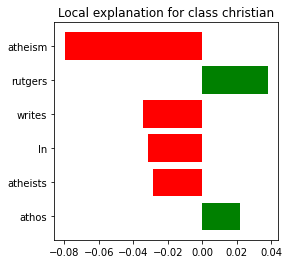

In [22]:
%matplotlib inline
fig = expnew.as_pyplot_figure()

In [23]:
def read_lime(interp):
    interp.as_list()
    interp2 = interp.local_exp#.items()

    interp3 = []
    for ii, jj in interp2[1]:
        interp3.append(jj)

    interp_feats = []
    for ii in range(len(expnew.local_exp[1])):
        interp_feats.append(interp.as_list()[ii][0])

    return interp3, interp_feats

lime_coeff_new, Lime_feat_new = read_lime(expnew)

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("SMILE","LIME",))

fig.add_trace(
    go.Bar(x=lime_coeff_new, y=Lime_feat_new, orientation='h', 
           marker=dict(color=np.argsort(lime_coeff_new), coloraxis="coloraxis")),#, color=df3['feature_names']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=exp3, y=feats, orientation='h', marker=dict(color=np.argsort(exp3), coloraxis="coloraxis")),
    row=1, col=2
)

fig.update_layout(height=600, width=1200, title_text="Comparing SMILE and LIME (Negative: Atheism, Positive: Christian)",
                  coloraxis=dict(colorscale='Bluered_r'), showlegend=False) # px.colors.sequential.Viridis
fig.show()

In [25]:
# Source: https://www.kaggle.com/naim99/innvestigate-albermax-modified
def plot_text_heatmap(words, scores, title="", width=10, height=0.2, verbose=0, max_word_per_line=20):
    fig = plt.figure(figsize=(width, height))
    
    ax = plt.gca()

    ax.set_title(title, loc='left')
    tokens = words
    if verbose > 0:
        print('len words : %d | len scores : %d' % (len(words), len(scores)))

    cmap = plt.cm.ScalarMappable(cmap=cm.bwr) #bwr #coolwarm #PiYG 'RdYlBu', 'RdYlGn'
    cmap.set_clim(0, 1)
    
    canvas = ax.figure.canvas
    t = ax.transData

    # normalize scores to the followings:
    # - negative scores in [0, 0.5]
    # - positive scores in (0.5, 1]
    normalized_scores = 0.5 * scores / np.max(np.abs(scores)) + 0.5
    
    if verbose > 1:
        print('Raw score')
        print(scores)
        print('Normalized score')
        print(normalized_scores)

    # make sure the heatmap doesn't overlap with the title
    loc_y = -0.2

    for i, token in enumerate(tokens):
        *rgb, _ = cmap.to_rgba(normalized_scores[i], bytes=True)
        color = '#%02x%02x%02x' % tuple(rgb)
        
        text = ax.text(0.0, loc_y, token,
                       bbox={
                           'facecolor': color,
                           'pad': 5.0,
                           'linewidth': 1,
                           'boxstyle': 'round,pad=0.5'
                       }, transform=t, fontsize=14)

        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        
        # create a new line if the line exceeds the length
        if (i+1) % max_word_per_line == 0:
            loc_y = loc_y -  2.5
            t = ax.transData
        else:
            t = transforms.offset_copy(text._transform, x=ex.width+15, units='dots')

    if verbose == 0:
        ax.axis('off')

In [26]:
explainer = LimeTextExplainer2(class_names=class_names)
expnew = explainer.explain_instance("I believe in god who creates the entire planet", c.predict_proba, num_features=9)

1000


In [27]:
lime_coeff_new, Lime_feat_new = read_lime(expnew)
lime_coeff_new

[-0.05318685758420623,
 0.006431065171706711,
 0.005766730127756307,
 -0.005098757055729917,
 -0.0034854987425102677,
 0.0018640174997172348,
 -0.001578313202444788,
 -0.000831168371869829,
 -0.0002768766503435682]

In [28]:
lime_coeff_new[0]

-0.05318685758420623

In [29]:
Lime_feat_new[0]

'god'

In [30]:
words2 = "I believe in god who creates the entire planet".split(' ')
words_imp = []
for ii in words2:
    words_imp.append(lime_coeff_new[Lime_feat_new.index(ii)])
    
words_imp

[-0.0002768766503435682,
 -0.000831168371869829,
 0.005766730127756307,
 -0.05318685758420623,
 0.0018640174997172348,
 -0.001578313202444788,
 0.006431065171706711,
 -0.0034854987425102677,
 -0.005098757055729917]

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm, transforms
plot_text_heatmap(
    "I believe in god who creates the entire planet".split(' '),
    np.array(words_imp)
)

In [32]:
ath_sentence = "For those who believe in God most of the big questions are answered But for those of us who can't readily accept the God formula the big answers don't remain stone-written. We adjust to new conditions and discoveries. We are pliable. Love need not be a command nor faith a dictum. I am my own god. We are here to unlearn the teachings of the church state, and our educational system. We are here to drink beer. We are here to kill war. We are here to laugh at the odds and live our lives so well that Death will tremble to take us -- Charles Bukowski"
explainer = LimeTextExplainer2(class_names=class_names)
expnew = explainer.explain_instance(ath_sentence, c.predict_proba, num_features=len(ath_sentence))

1000


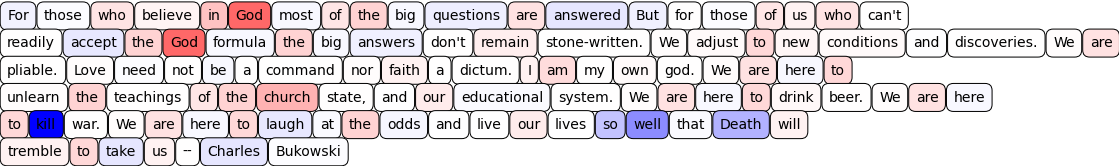

In [33]:
lime_coeff_new, Lime_feat_new = read_lime(expnew)
words2 = ath_sentence.split(' ')
words_imp = []
for ii in words2:
    if ii not in Lime_feat_new:
        words_imp.append(0)
    else:
        words_imp.append(lime_coeff_new[Lime_feat_new.index(ii)])
    
plot_text_heatmap(words2, np.array(words_imp))